# Example Cell4
     1. Running METROID with all parameters at default
        * Results
            a. Without electrical stimulation
            b. Triggered action potential (AP)
            c. Triggered electroporation
    2. Running METROID with optimized parameters
        * Results
            a. Without electrical stimulation
            b. Triggered action potential (AP) (using ICA)
            c. Triggered electroporation (using wPCA with Haar)
    3. Membrane potential calculation
        * Membrane potential results

__Load dependencies__

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import sys,os
    
metroidpath = os.path.abspath('../')
if metroidpath not in sys.path:
    sys.path.append(metroidpath)
items = os.listdir(metroidpath)
if 'MESS.py' not in items:
    ! jupyter nbconvert --to python ../MESS.ipynb --output-dir ../
if 'Remove_Photobleaching.py' not in items:
    ! jupyter nbconvert --to 'python' ../Remove_Photobleaching.ipynb --output-dir ../
if 'BSSD.py' not in items:
    ! jupyter nbconvert --to 'python' ../BSSD.ipynb --output-dir ../
if 'METROID.py' not in items:
    ! jupyter nbconvert --to 'python' ../METROID.ipynb --output-dir ../
import MESS as mes
import Remove_Photobleaching as rpb
import BSSD as bssd
import METROID as metroid

## Mandatory Parameters:
__User can edit the cell below__

In [2]:
fpath = '../Data\\Cell4'
fr_list = [63, 64.45, 64.45, 63.12] #Cell4
transitory=None

## 1. Running METROID with all parameters at default
    - estimated t_sig_onset;
    - estimated t_sig_end;
    - default method ('ICA');
    - default n_comp (2);
    - default wavelet ('Haar');
    - autoselect source with signal.

#### a. Video without electrical stimulation (video0)

In [3]:
v0path = fpath + '\\video0'
transitory = None

stack_ROIs_0, label_ROIs_0, ROIs_means_filtered_0, time_0, \
ROIs_means_0, ROIs_means_corrected_0,  \
mask_list_0, components_0, selected_source_idx_0, \
t_sig_prop_0, SNR_dB_0 = metroid.metroid(v0path, fr_list[0], transitory)

#### b. Videos with triggered action potential (videos_AP)

In [4]:
vmidpath = fpath + '\\videos_AP'
transitory = True

stack_ROIs_AP, label_ROIs_AP, ROIs_means_filtered_AP, time_AP, \
ROIs_means_AP, ROIs_means_corrected_AP,  \
mask_list_AP, components_AP, selected_source_idx_AP, \
t_sig_prop_AP, SNR_dB_AP = metroid.metroid(vmidpath, fr_list[1:-1], transitory)

#### c. Video with triggered electroporation (video_EP)

In [5]:
vlastpath = fpath + '\\video_EP'
transitory = False

stack_ROIs_EP, label_ROIs_EP, ROIs_means_filtered_EP, time_EP, \
ROIs_means_EP, ROIs_means_corrected_EP,  \
mask_list_EP, components_EP, selected_source_idx_EP, \
t_sig_prop_EP, SNR_dB_EP = metroid.metroid(vlastpath, fr_list[-1], transitory)            

### Results
#### a. Video without electrical stimulation (video0)

In [6]:
nregions = np.amax(label_ROIs_0).astype(int)
ncolors = nregions
from matplotlib import cm
from matplotlib.colors import ListedColormap
brg = cm.get_cmap('brg', nregions)
newcolors = np.tile((np.arange(0,ncolors))/(ncolors-1),nregions//(ncolors-1))
newcolors = newcolors[:nregions]
newcolors = brg(newcolors)
black = np.array([0, 0, 0, 1])
newcolors = np.insert(newcolors,0,black,axis=0)
newcmp = ListedColormap(newcolors)

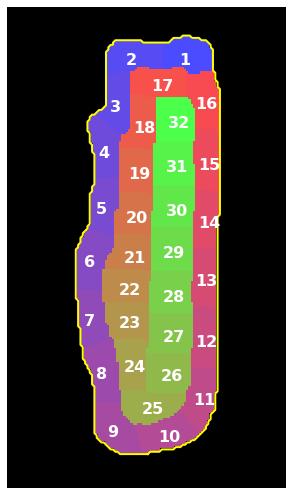

In [7]:
fig, ax = plt.subplots(figsize=[5,10],nrows=1, ncols=1)
ax.imshow(label_ROIs_0, cmap=newcmp)

cent_coord = np.zeros((nregions,2))
fontsize=16
for j in range(nregions):
    cent_coord[j,:] = np.rint(mes.get_centroid(stack_ROIs_0[j,:,:]))
    offset = -fontsize//2
    ax.annotate(j+1,(cent_coord[j,0],cent_coord[j,1]),xycoords='data',xytext=(offset, offset),
                textcoords='offset points',color='white',fontsize=fontsize,weight='bold')
ax.axis('off')
contour = mes.build_contour(mask_list_0[0])
ax.imshow(mask_list_0[0],cmap='gray',alpha=0.3)
ax.plot(contour[:,1],contour[:,0],color='yellow',lw=2)

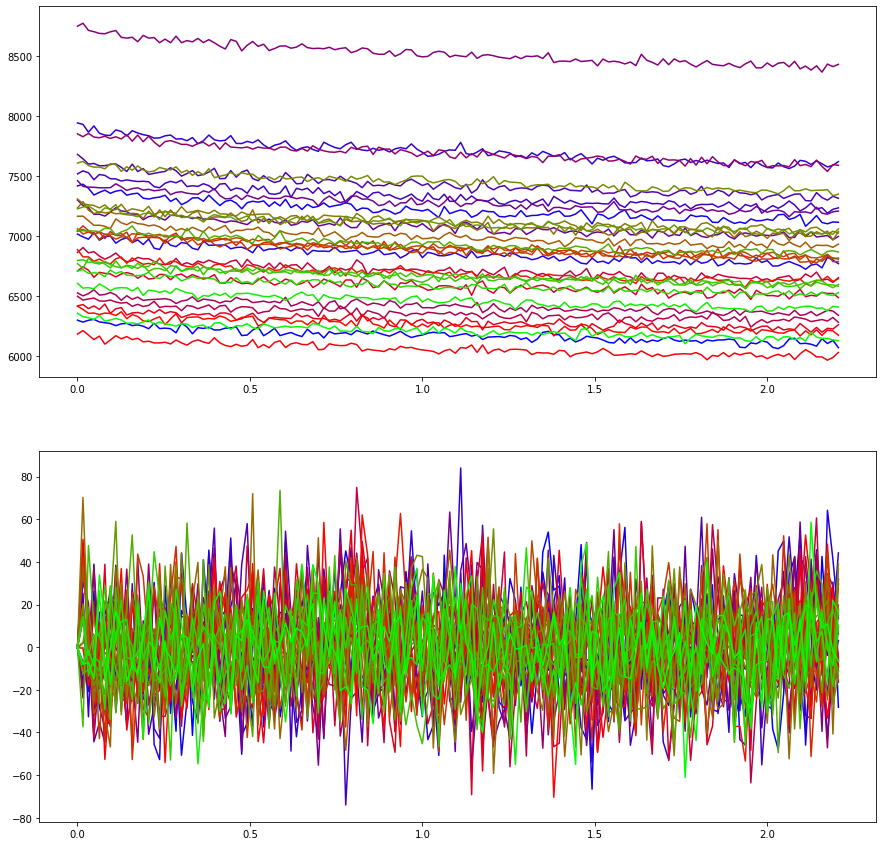

In [8]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=[15,15])
for j in range(stack_ROIs_0.shape[0]):
    ax[0].plot(time_0,ROIs_means_0[:,j],color=newcolors[j+1,:])
    ax[1].plot(time_0,ROIs_means_corrected_0[:,j],color=newcolors[j+1,:])

#### b. Videos with triggered action potential (videos_AP)

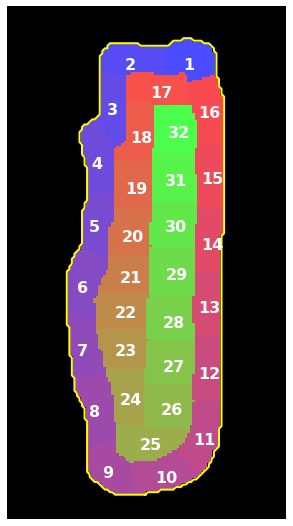

In [9]:
fig, ax = plt.subplots(figsize=[5,10],nrows=1, ncols=1)
ax.imshow(label_ROIs_AP, cmap=newcmp)

cent_coord = np.zeros((nregions,2))
fontsize=16
for j in range(nregions):
    cent_coord[j,:] = np.rint(mes.get_centroid(stack_ROIs_AP[j,:,:]))
    offset = -fontsize//2
    ax.annotate(j+1,(cent_coord[j,0],cent_coord[j,1]),xycoords='data',xytext=(offset, offset),
                textcoords='offset points',color='white',fontsize=fontsize,weight='bold')
ax.axis('off')
contour = mes.build_contour(mask_list_AP[0])
ax.imshow(mask_list_AP[0],cmap='gray',alpha=0.3)
ax.plot(contour[:,1],contour[:,0],color='yellow',lw=2)

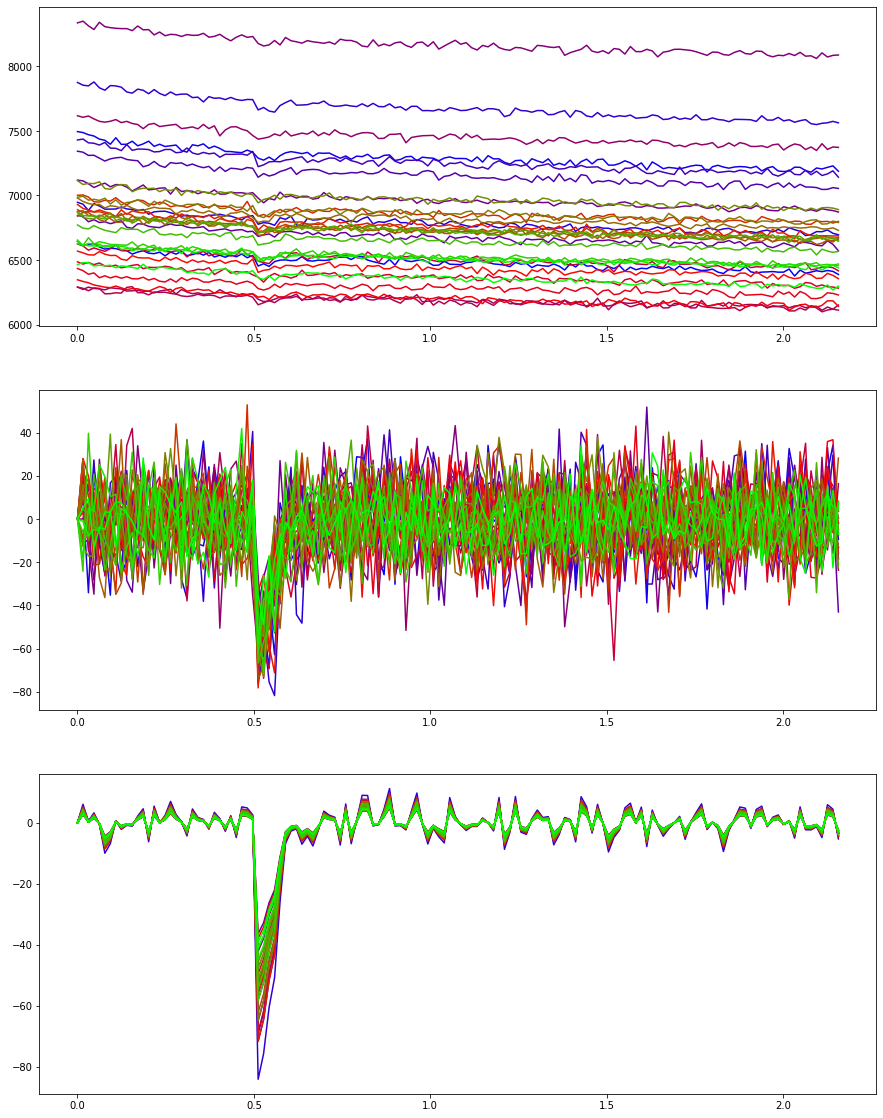

In [10]:
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=[15,20])
for j in range(stack_ROIs_AP.shape[0]):
    ax[0].plot(time_AP,ROIs_means_AP[:,j],color=newcolors[j+1,:])
    ax[1].plot(time_AP,ROIs_means_corrected_AP[:,j],color=newcolors[j+1,:])
    ax[2].plot(time_AP,ROIs_means_filtered_AP[:,j],color=newcolors[j+1,:])

In [11]:
print('Signal onset time: %.3f' % t_sig_prop_AP[0],'s\n')
print('Signal end time: %.3f' % t_sig_prop_AP[1],'s\n')
print('Signal-to-Noise Ratio per ROI:\n',SNR_dB_AP,'dB')

Signal onset time: 0.512 s

Signal end time: 0.574 s

Signal-to-Noise Ratio per ROI:
 [-4.01716156 -4.69063084 -6.1826678  -1.83221648 -4.81011136 -6.3575275
 -9.5875604  -6.8288397  -9.28840673 -6.13904031 -5.85430501 -5.77526741
 -4.82611926 -6.1955725  -7.18037441 -8.82653935 -5.81390785 -3.94911889
 -5.68175667 -5.63005633 -4.4334046  -6.18092008 -5.22283228 -4.03137418
 -7.1057096  -5.86278533 -6.03116967 -4.65984729 -4.62143654 -5.62971588
 -6.29587618 -6.4993514 ] dB


#### c. Video with triggered electroporation (video_EP)

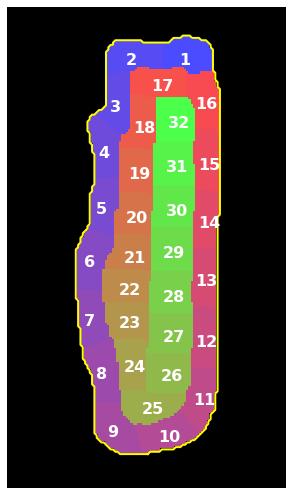

In [12]:
fig, ax = plt.subplots(figsize=[5,10],nrows=1, ncols=1)
ax.imshow(label_ROIs_EP, cmap=newcmp)

cent_coord = np.zeros((nregions,2))
fontsize=16
for j in range(nregions):
    cent_coord[j,:] = np.rint(mes.get_centroid(stack_ROIs_EP[j,:,:]))
    offset = -fontsize//2
    ax.annotate(j+1,(cent_coord[j,0],cent_coord[j,1]),xycoords='data',xytext=(offset, offset),
                textcoords='offset points',color='white',fontsize=fontsize,weight='bold')
ax.axis('off')
contour = mes.build_contour(mask_list_EP[0])
ax.imshow(mask_list_EP[0],cmap='gray',alpha=0.3)
ax.plot(contour[:,1],contour[:,0],color='yellow',lw=2)

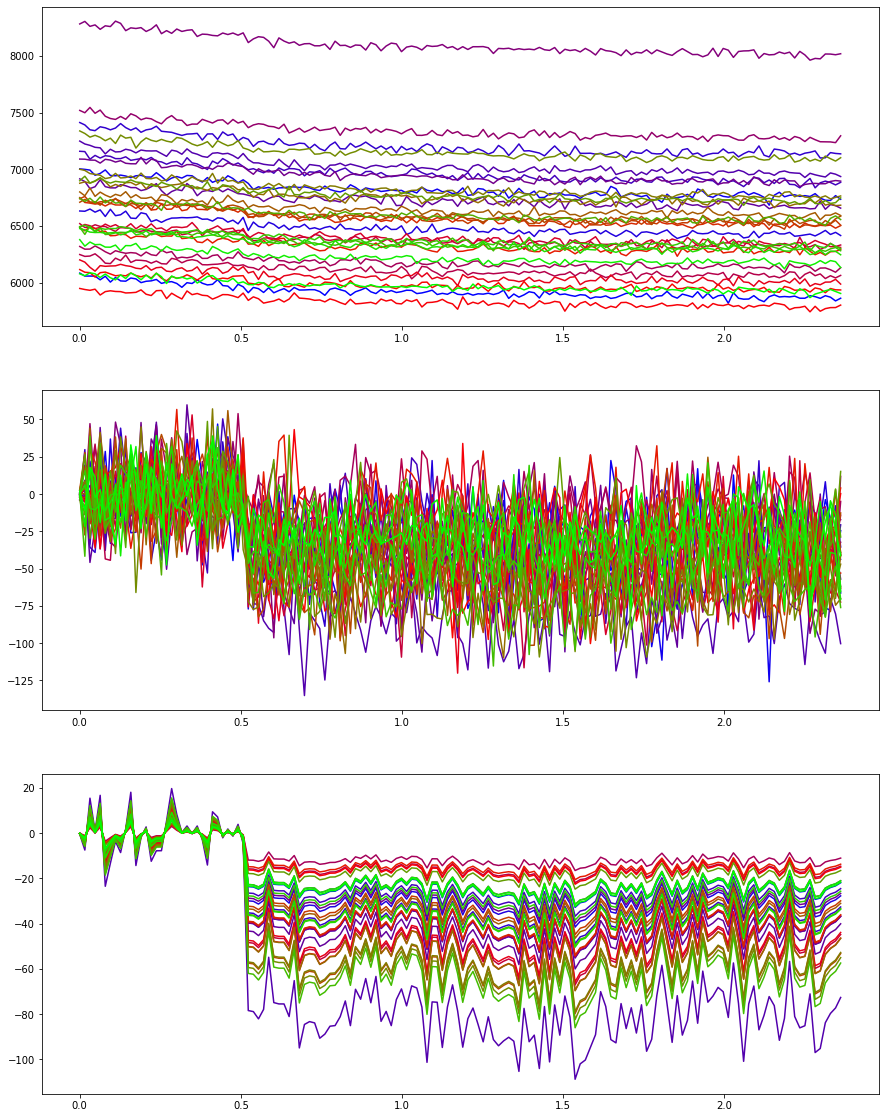

In [13]:
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=[15,20])
for j in range(stack_ROIs_EP.shape[0]):
    ax[0].plot(time_EP,ROIs_means_EP[:,j],color=newcolors[j+1,:])
    ax[1].plot(time_EP,ROIs_means_corrected_EP[:,j],color=newcolors[j+1,:])
    ax[2].plot(time_EP,ROIs_means_filtered_EP[:,j],color=newcolors[j+1,:])

In [14]:
print('Signal onset time: %.3f' % t_sig_prop_EP[0],'s\n')
print('Signal end time:', t_sig_prop_EP[1],'\n')
print('Signal-to-Noise Ratio per ROI:\n',SNR_dB_EP,'dB')

Signal onset time: 0.523 s

Signal end time: None 

Signal-to-Noise Ratio per ROI:
 [ 2.73097936  5.93401704  1.82252869  3.76393197  1.39573122 12.03581797
  3.58140278  2.7105285   4.32281251 -1.19401382 -4.28149765 -3.37461733
 10.37012698  4.51172591  6.99920874 -2.37183761  8.41496662 -3.96050073
  5.94662284  3.31140114  8.83831309  2.48735468  8.32834685  7.99127181
  6.75858177 -0.91798039  4.51407961 10.49516847  4.86538007  7.71283104
  1.11322218 -0.33436955] dB


## 2. Running METROID with optimized parameters
    - estimated t_sig_onset = 0.5sec (2.5sec for EP video);
    - estimated t_sig_end = 0.6sec (None for EP video);
    - method ('ICA' for AP videos and 'wPCA' for EP video);
    - default n_comp (2, but 3 for EP video);
    - wavelet: Haar; for EP video
    - manual selection of source with signal.

#### a. Video without electrical stimulation (video0)

In [15]:
v0path = fpath + '\\video0'
transitory = None

stack_ROIs_0, label_ROIs_0, ROIs_means_filtered_0, time_0, \
ROIs_means_0, ROIs_means_corrected_0,  \
mask_list_0, components_0, selected_source_idx_0, \
t_sig_prop_0, SNR_dB_0 = metroid.metroid(v0path, fr_list[0], transitory)

#### b. Videos with triggered action potential (videos_AP, using ICA)

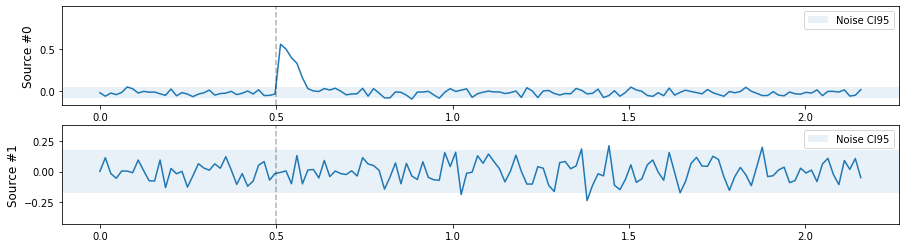

Enter one or more sources number (separate numbers by "," if number of sources > 1): 0


In [16]:
vmidpath = fpath + '\\videos_AP'
transitory = True
t_sig_onset = 0.5
t_sig_end = 0.6
n_comp = 2
wavelet = 'dmey'
method = 'ICA'
autoselect = 'manual'

stack_ROIs_AP, label_ROIs_AP, ROIs_means_filtered_AP, time_AP, \
ROIs_means_AP, ROIs_means_corrected_AP, \
mask_list_AP, components_AP, selected_source_idx_AP, \
t_sig_prop_AP, SNR_dB_AP = metroid.metroid(vmidpath, fr_list[1:-1], transitory,16,16,
                                                                  t_sig_onset,t_sig_end,
                                                                   method,n_comp,wavelet,autoselect)

#### c. Video with triggered electroporation (video_EP, using wPCA with Haar)

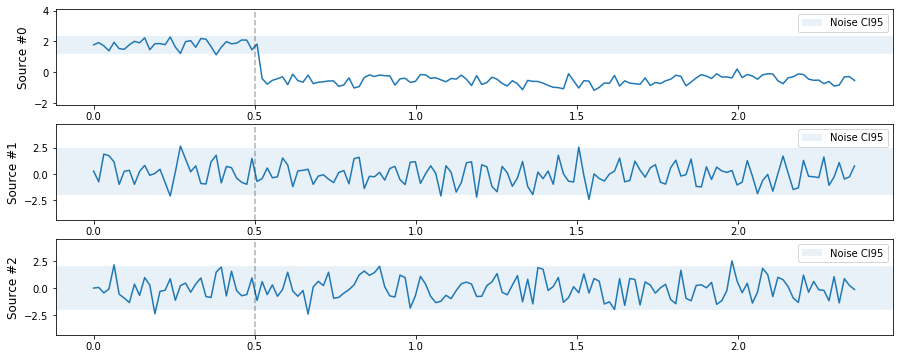

Enter one or more sources number (separate numbers by "," if number of sources > 1): 0


In [17]:
vlastpath = fpath + '\\video_EP'
transitory = False
t_sig_onset = 0.5
t_sig_end = None
n_comp = 3
wavelet = 'Haar'
method = 'wPCA'
autoselect = 'manual'

stack_ROIs_EP, label_ROIs_EP, ROIs_means_filtered_EP, time_EP, \
ROIs_means_EP, ROIs_means_corrected_EP,  \
mask_list_EP, components_EP, selected_source_idx_EP, \
t_sig_prop_EP, SNR_dB_EP = metroid.metroid(vlastpath, fr_list[-1],transitory,16,16,
                                                                  t_sig_onset,t_sig_end,
                                                                   method,n_comp,wavelet,autoselect)         

### Results
#### a. Video without electrical stimulation (video0)

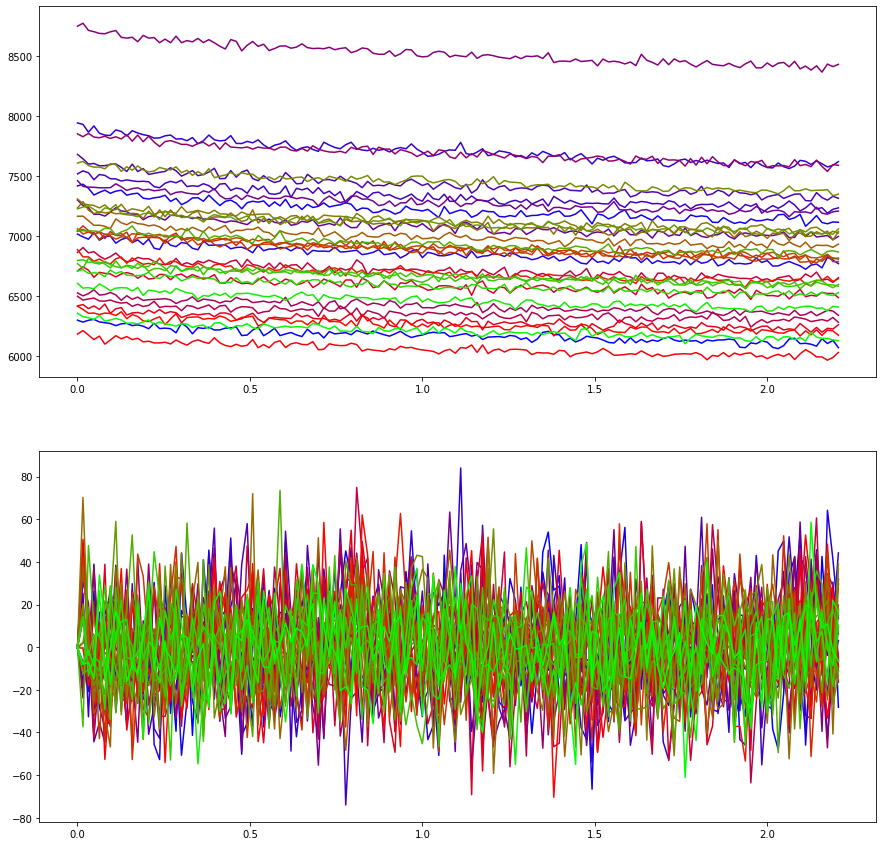

In [18]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=[15,15])
for j in range(stack_ROIs_0.shape[0]):
    ax[0].plot(time_0,ROIs_means_0[:,j],color=newcolors[j+1,:])
    ax[1].plot(time_0,ROIs_means_corrected_0[:,j],color=newcolors[j+1,:])

#### b. Videos with triggered action potential (videos_AP, using ICA)

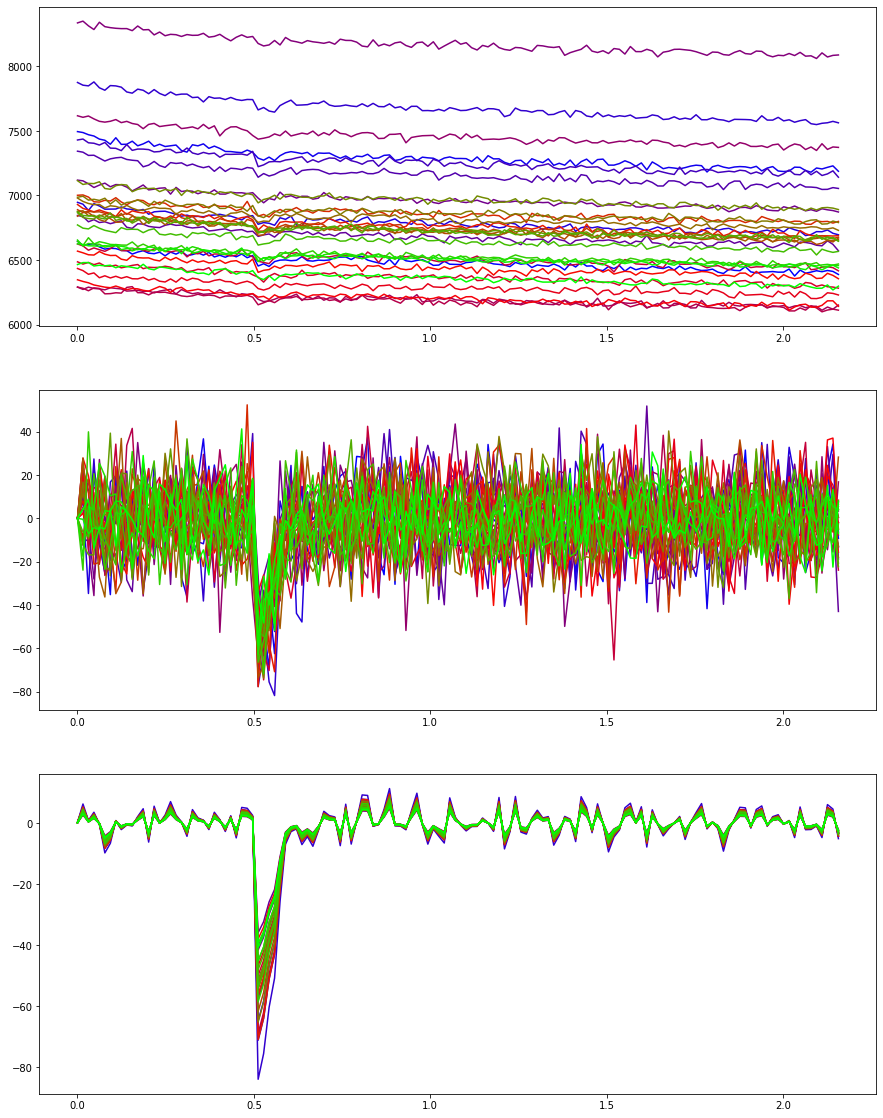

In [19]:
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=[15,20])
for j in range(stack_ROIs_AP.shape[0]):
    ax[0].plot(time_AP,ROIs_means_AP[:,j],color=newcolors[j+1,:])
    ax[1].plot(time_AP,ROIs_means_corrected_AP[:,j],color=newcolors[j+1,:])
    ax[2].plot(time_AP,ROIs_means_filtered_AP[:,j],color=newcolors[j+1,:])

In [20]:
print('Signal onset time: %.3f' % t_sig_prop_AP[0],'s\n')
print('Signal end time: %.3f' % t_sig_prop_AP[1],'s\n')
print('Signal-to-Noise Ratio per ROI:\n',SNR_dB_AP,'dB')

Signal onset time: 0.500 s

Signal end time: 0.600 s

Signal-to-Noise Ratio per ROI:
 [-4.03863043 -4.79123751 -6.26645223 -1.89811435 -4.67310666 -6.49913281
 -9.74472223 -6.77630535 -9.62771319 -5.62720028 -5.82325682 -5.67665257
 -4.76820348 -6.08423761 -7.32445927 -8.79850076 -5.93704574 -4.05103097
 -5.60334291 -5.7335342  -4.54986946 -6.21335435 -5.0319966  -3.98923369
 -7.23926355 -5.76309111 -5.93245889 -4.59747717 -4.62992557 -5.45991005
 -6.07318549 -6.56440605] dB


#### c. Video with triggered electroporation (video_EP, using wPCA with Haar)

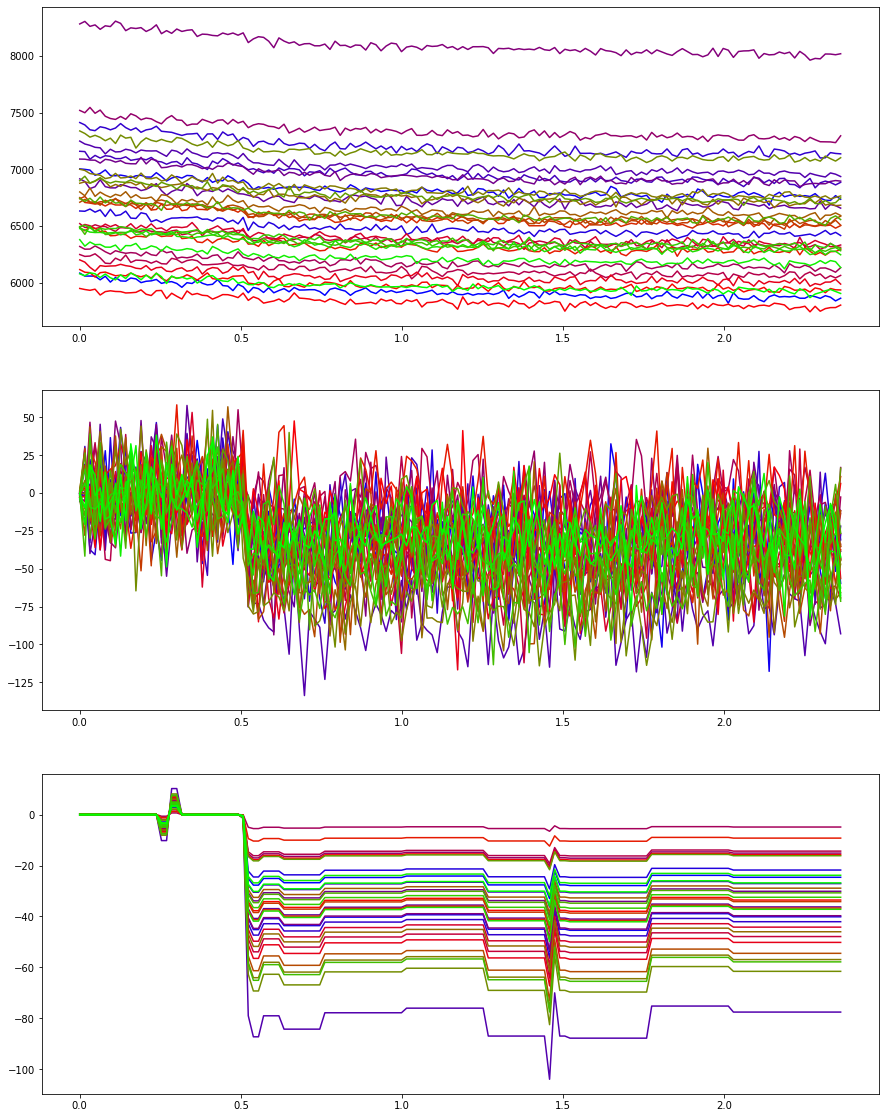

In [21]:
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=[15,20])
for j in range(stack_ROIs_EP.shape[0]):
    ax[0].plot(time_EP,ROIs_means_EP[:,j],color=newcolors[j+1,:])
    ax[1].plot(time_EP,ROIs_means_corrected_EP[:,j],color=newcolors[j+1,:])
    ax[2].plot(time_EP,ROIs_means_filtered_EP[:,j],color=newcolors[j+1,:])

In [22]:
print('Signal onset time: %.3f' % t_sig_prop_EP[0],'s\n')
print('Signal end time:', t_sig_prop_EP[1],'\n')
print('Signal-to-Noise Ratio per ROI:\n',SNR_dB_EP,'dB')

Signal onset time: 0.500 s

Signal end time: None 

Signal-to-Noise Ratio per ROI:
 [  2.94437864   6.08228381  -1.17571066   5.08939852   1.4676072
  11.7541054    1.84615452   3.23628316   4.20341038  -4.92697892
 -12.14909084  -4.41533488  10.24862325   5.35209655   7.40455583
  -2.48643626   4.59205782  -7.97845393   5.42581548   3.77750167
   8.2296013    1.40325443   7.36281779   9.25407949   7.37168921
  -1.68742943   2.90831749   9.67590199   6.04262713   7.92223189
   2.04885633   1.0658563 ] dB


## 3. Membrane potential calculation

### Calculate AP properties

Signal start and end: (0.5, 0.6) s
APD25 = 46.548 ms
APD75 = 77.580 ms


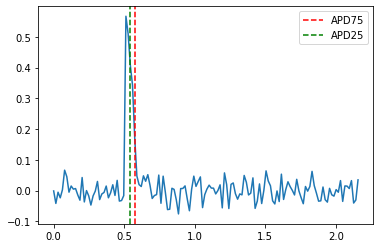

In [23]:
print('Signal start and end:',t_sig_prop_AP, 's')
#Get signal onset and end indices
t_sig_onset_idx = np.argmin(abs(time_AP - t_sig_prop_AP[0]))
if t_sig_prop_AP[1] is not None:
    t_sig_end_idx = np.argmin(abs(time_AP - t_sig_prop_AP[1]))

#Get selected source and makes signal positive
source = components_AP[:,selected_source_idx_AP]
if (abs(source.min()))>(abs(source.max())):
    source = -source
#Get source base value from innactive interval
if t_sig_prop_AP[1] is not None:
    base = np.median(np.concatenate((source[:t_sig_onset_idx],source[t_sig_end_idx:])),axis=0)
else:
    base = np.median(source[:t_sig_onset_idx])
#Get AP signal peak and peak index
peak = np.amax(source-base)
peakidx = np.argmax(source-base)

peak25 = 0.25*peak
peak75 = 0.75*peak

if t_sig_prop_AP[1] is not None:
    idx = (np.abs(source[peakidx:t_sig_end_idx] - peak75)).argmin()
else:
    idx = (np.abs(source[peakidx:] - peak75)).argmin()
idxAPD25 = idx+peakidx

APD25 = (time_AP[idxAPD25] - time_AP[t_sig_onset_idx])*1000
print('APD25 = %.3f' % APD25,'ms')

if t_sig_prop_AP[1] is not None:
    idx = (np.abs(source[peakidx:t_sig_end_idx] - peak25)).argmin()
else:
    idx = (np.abs(source[peakidx:] - peak25)).argmin()
idxAPD75 = idx+peakidx

APD75 = (time_AP[idxAPD75] - time_AP[t_sig_onset_idx])*1000
print('APD75 = %.3f' % APD75,'ms')

plt.plot(time_AP,source-base)
plt.axvline(x=time_AP[idxAPD75],ls='--',label='APD75',color='r')
plt.axvline(x=time_AP[idxAPD25],ls='--',label='APD25',color='g')
plt.legend()

### Estimated SNR

(array([-15., -10.,  -5.,   0.,   5.,  10.,  15.]),
 <a list of 7 Text yticklabel objects>)

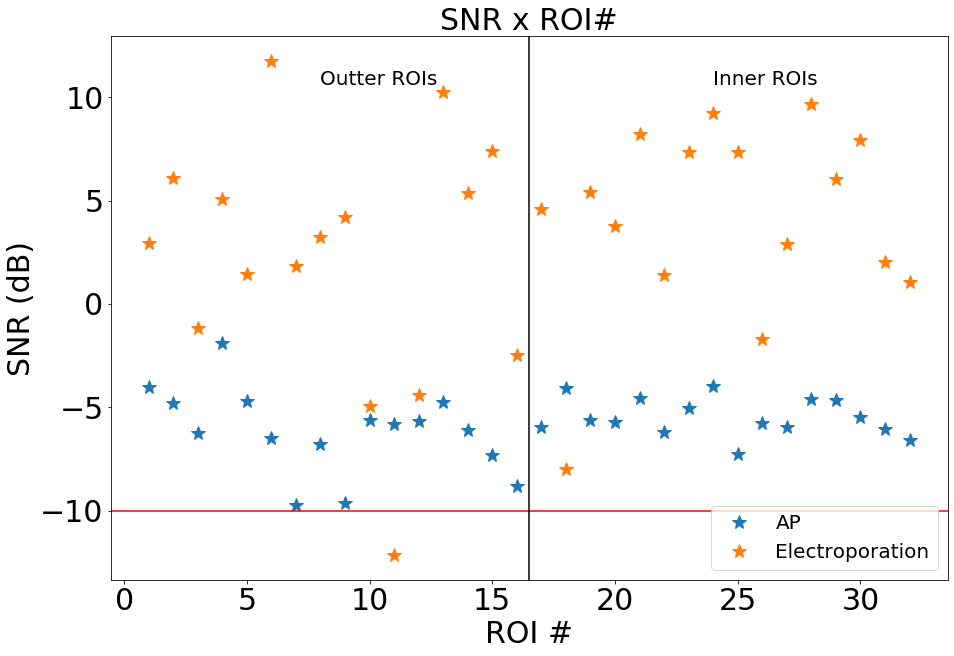

In [24]:
plt.figure(figsize=[15,10])
plt.plot(np.arange(1,nregions+1),SNR_dB_AP,'*',label='AP',ms=15)
plt.plot(np.arange(1,nregions+1),SNR_dB_EP,'*',label='Electroporation',ms=15)
plt.title('SNR x ROI#',fontsize=30)
plt.xlabel('ROI #',fontsize=30)
plt.ylabel('SNR (dB)',fontsize=30)
plt.axhline(y=-10, color='r')
plt.axvline(x=nregions//2+0.5,color='k')
plt.annotate('Outter ROIs',(nregions//4,0.9*(np.amax([np.amax(SNR_dB_EP),np.amax(SNR_dB_AP)]))),fontsize=20)
plt.annotate('Inner ROIs',(nregions//2+(nregions//4),0.9*(np.amax([np.amax(SNR_dB_EP),np.amax(SNR_dB_AP)]))),fontsize=20)
plt.legend(fontsize=20,loc=4)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

### Noise Reduction Calculation

In [25]:
if t_sig_prop_AP[1] is None:
    innactive_mask_AP = ((time_AP>0) & (time_AP<t_sig_prop_AP[0]-0.1))
else:
    innactive_mask_AP = ((time_AP>0) & (time_AP<t_sig_prop_AP[0]-0.1)) | ((time_AP>t_sig_prop_AP[1]))
noise_AP = bssd.get_noise_power(ROIs_means_corrected_AP,time_AP,innactive_mask_AP)
noise_AP_filt = bssd.get_noise_power(ROIs_means_filtered_AP,time_AP,innactive_mask_AP)
active_mask_AP = np.invert(innactive_mask_AP)

AP_noise_Reduction = noise_AP_filt/noise_AP
AP_noise_Reduction_mean = np.mean((1-AP_noise_Reduction)*100)
np.set_printoptions(precision=2)
print('AP mean noise reduction: %.2f' % AP_noise_Reduction_mean,'%')

AP mean noise reduction: 95.78 %


In [26]:
innactive_mask_EP = ((time_EP>0) & (time_EP<t_sig_prop_EP[0]-0.1))
active_mask_EP = np.invert(innactive_mask_EP)
noise_EP = bssd.get_noise_power(ROIs_means_corrected_EP,time_EP,innactive_mask_EP)
noise_EP_filt = bssd.get_noise_power(ROIs_means_filtered_EP,time_EP,innactive_mask_EP)

EP_noise_Reduction = noise_EP_filt/noise_EP
EP_noise_Reduction_mean = np.mean((1-EP_noise_Reduction)*100)
np.set_printoptions(precision=2)
print('Electroporation mean noise reduction: %.2f' % EP_noise_Reduction_mean,'%')

Electroporation mean noise reduction: 98.82 %


## Calibration

In [27]:
AP_amplitude = 120
Resting = -80

In [28]:
AP_max = np.amax(abs(ROIs_means_corrected_AP),axis=0)
AP_filtered_max = np.amax(abs(ROIs_means_filtered_AP),axis=0)

print('AP_max = \n',AP_max)
print('AP_filtered_max = \n',AP_filtered_max)

AP_max = 
 [68.8  63.2  52.2  81.74 77.56 63.25 51.83 61.2  51.52 63.63 48.84 60.93
 70.19 74.5  49.81 48.5  67.1  77.66 62.15 62.56 73.58 56.16 62.26 73.71
 64.52 57.08 54.61 66.35 71.75 62.92 58.48 51.7 ]
AP_filtered_max = 
 [64.87 71.18 52.4  83.99 69.98 57.5  35.94 41.59 40.33 56.73 51.61 56.6
 68.97 49.97 46.74 37.97 54.44 70.98 56.38 53.76 61.7  52.96 52.09 65.2
 45.19 51.93 48.06 53.96 58.55 45.14 39.46 40.81]


In [29]:
AP_filt = ((-(ROIs_means_filtered_AP)/AP_filtered_max)*AP_amplitude)+Resting
AP = ((-(ROIs_means_corrected_AP)/AP_max)*AP_amplitude)+Resting

In [30]:
EP_filt = ((-(ROIs_means_filtered_EP)/AP_filtered_max)*AP_amplitude)+Resting
EP = ((-(ROIs_means_corrected_EP)/AP_filtered_max)*AP_amplitude)+Resting

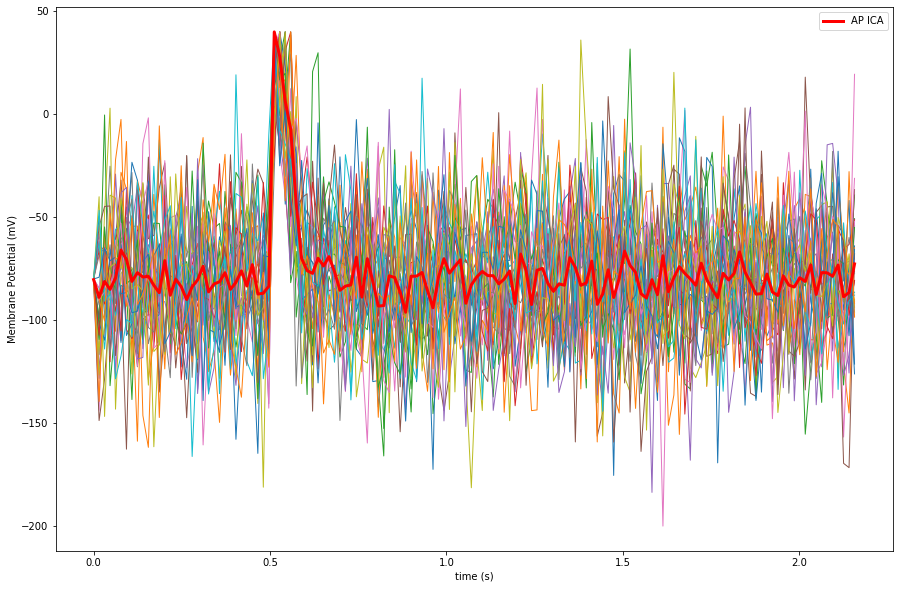

In [31]:
plt.figure(figsize=[15,10])
plt.plot(time_AP,AP,linewidth=1)
plt.plot(time_AP,AP_filt[:,0],linewidth=3,color='red',label = 'AP ICA')
plt.xlabel('time (s)')
plt.ylabel('Membrane Potential (mV)')
plt.legend()

### Save data

In [32]:
name = 'ROIs_means_'
output_path = fpath + '\\Outputs\\'
ftxtname = output_path + name + 'AP.csv'
fobj = open(ftxtname,mode="w")
fobj.write("time;APfilt;AP\n")

roi_str = 'ROI#'
line=''
for i in range(nregions):
    line = line + roi_str + str(i+1) + ';'
secondline = ';ROI#1;' + line +'\n'
fobj.write(secondline)

values = AP_filt[:,0]
matrix = np.zeros((len(time_AP),nregions+2))
matrix[:,0] = time_AP
matrix[:,1] = AP_filt[:,0]
matrix[:,2:] = AP

fmt0 = ['%.3f']
for i in range(nregions+1):
    fmt0.append('%.2f')
np.savetxt(fobj, matrix,fmt=fmt0, delimiter=';', newline='\n')

fobj.close()

In [33]:
ftxtname = output_path + name + 'EP.csv'
fobj = open(ftxtname,mode="w")
dotc = ';'
for i in range((nregions)-1):
    dotc = dotc + ';'
firstline = 'time;EPfilt' + dotc + 'EP\n'
fobj.write(firstline)

roi_str = 'ROI#'
line=''
for i in range(nregions):
    line = line + roi_str + str(i+1) + ';'
secondline = ';' + line + line + '\n'
fobj.write(secondline)

matrix = np.zeros((len(time_EP),(2*(nregions))+1))
matrix[:,0] = time_EP
matrix[:,1:(nregions)+1] = EP_filt
matrix[:,(nregions)+1:(2*(nregions))+1] = EP
fmt0 = ['%.3f']
for i in range((2*(nregions))):
    fmt0.append('%.2f')
np.savetxt(fobj, matrix,fmt=fmt0, delimiter=';', newline='\n')

fobj.close()

## Plot data

In [34]:
def build_contour_ROIs(msk):
    '''Generates a gray contour from binary masks and extracts the contour'''
    import scipy.ndimage as sm
    import numpy as np
    from skimage import measure
    contour = measure.find_contours(msk, 0.8, positive_orientation = 'high')
    
    if len(contour)>1:
        largest = np.size(contour[0])
        for c in contour:
            if np.size(c)>np.size(largest):
                largest = c
        contour=largest
    else:
        contour = contour[0]
    contour = np.around(contour)
    return(contour)

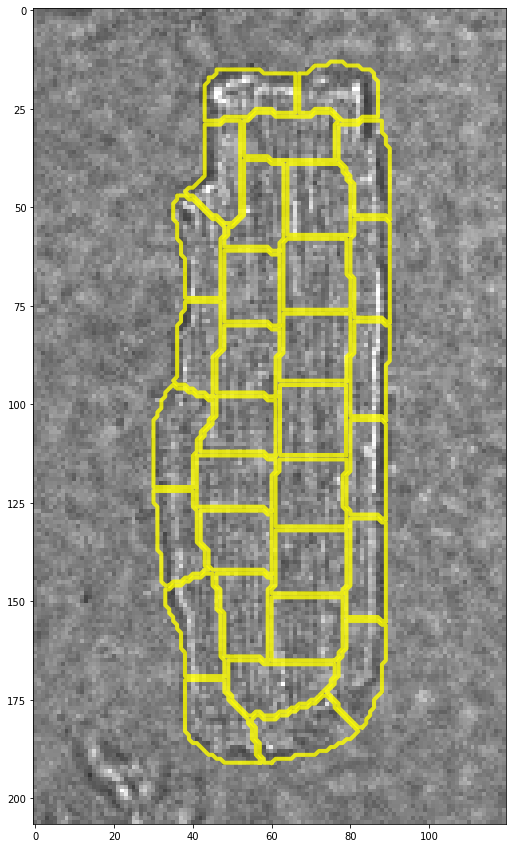

In [35]:
from skimage import io
snap = io.imread(fpath+'\\video_EP\\snap.tif')
plt.figure(figsize=[25,15])
plt.imshow(snap,cmap='gray',vmin=0,vmax=np.amax(snap))
contour = np.zeros_like(label_ROIs_EP,bool)
for i in range(nregions):
    contour = build_contour_ROIs(stack_ROIs_EP[i])
    plt.plot(contour[:,1],contour[:,0],color='yellow',lw=4,alpha=0.8)

### Membrane potential results
#### ROI signal x time

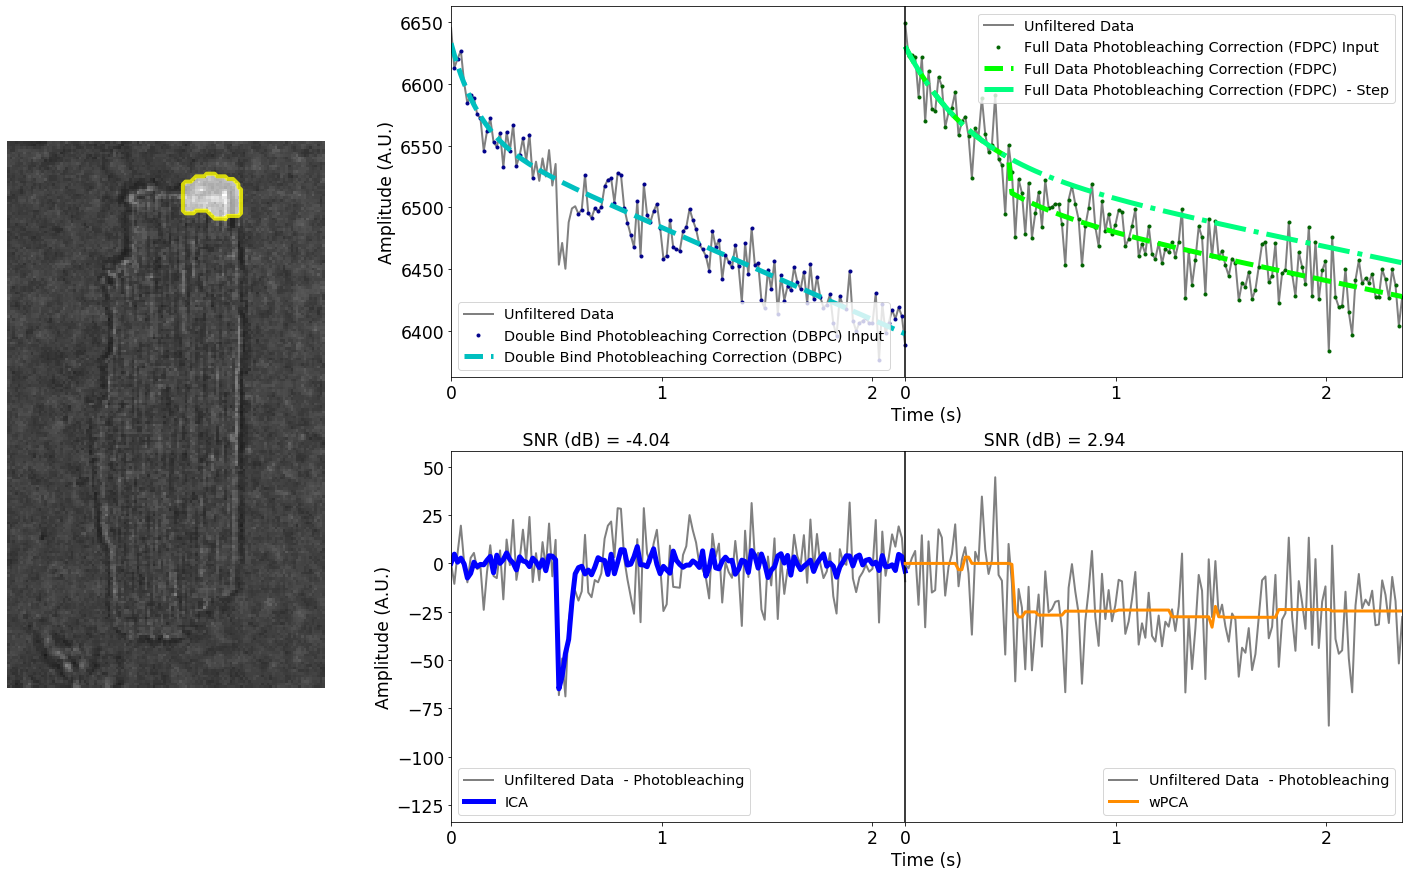

In [36]:
ymin = np.amin(ROIs_means_corrected_EP)
ymax = np.amax(ROIs_means_corrected_EP)
from scipy.optimize import curve_fit
for i in range(nregions): 

    plt.figure(figsize=[25,15])
    import matplotlib.gridspec as gridspec
    gs = gridspec.GridSpec(2, 2,
                           width_ratios=[1, 3],
                           height_ratios=[1, 1]
                           )
    ax1 = plt.subplot(gs[0:,0])
    snap = io.imread(fpath+'\\video_EP\\snap.tif')
    plt.imshow(snap,cmap='gray',vmin=0,vmax=np.amax(snap))
    contour = np.zeros_like(label_ROIs_EP,bool)
    contour = mes.build_contour(stack_ROIs_EP[i])
    plt.plot(contour[:,1],contour[:,0],color='yellow',lw=4,alpha=0.8)
    plt.imshow(stack_ROIs_EP[i],cmap='gray',alpha=0.5)
    ax1.axis('off')
    ##################################################################################
    ax2 = plt.subplot(gs[1])
    '''PLOT AP'''
    ax2.plot(time_AP,ROIs_means_AP[:,i],'-',color='gray',lw=2,label='Unfiltered Data')
    photobleaching = ROIs_means_AP[innactive_mask_AP,i]
    time_photob = time_AP[innactive_mask_AP]
    plt.plot(time_photob,photobleaching,'.',ms=6,color='darkblue',
             label='Double Bind Photobleaching Correction (DBPC) Input')

    y0 = np.mean(photobleaching[:5])
    yf = np.mean(photobleaching[-5:])
    #FIT #1:    linear fit
    c, d = np.polyfit(time_photob,photobleaching,1)
    p = np.poly1d([c,d])

     #FIT #2:    monoexp and line fit
    upper_bounds = [2*(y0-yf), 2*(np.log(d-(c*yf)-c)-np.log(y0-yf)), 2*(abs(c)), 2*yf]
    popt2, pcov2 = curve_fit(rpb.monoexp_and_line, time_AP[innactive_mask_AP], photobleaching, bounds=(0, upper_bounds))
    res_expline = photobleaching - rpb.monoexp_and_line(time_AP[innactive_mask_AP], *popt2)
    total_res_expline = np.sum(abs(res_expline**2))/len(photobleaching)

    #If any fit parameter gets close to its respective upper_boundary, expand upper_boundaries and retries fit   
    if np.all(np.greater(upper_bounds,popt2+0.01*(popt2)))==False:
        clip_flag = 1
        while(clip_flag==1):
            close = np.isclose(upper_bounds,popt2,atol=1e-02)
            if np.any(close)==False:  #if can't identify which parameter is clipped, duplicate all
                upper_bounds = np.multiply(2,upper_bounds)
            else:                     #if clipped parameter is identified, duplicate it
                closeidx = np.argwhere(close)[0][0]
                upper_bounds[closeidx] = np.multiply(2,upper_bounds[closeidx])
            popt2, pcov2 = curve_fit(rpb.monoexp_and_line, time_AP[innactive_mask_AP], photobleaching, bounds=(0, upper_bounds))
            res_expline = photobleaching - rpb.monoexp_and_line(time_AP[innactive_mask_AP], *popt2)
            total_res_expline = np.sum(abs(res_expline**2))/len(photobleaching)
            if np.all(np.greater(upper_bounds,popt2+0.01*(popt2)))==True:
                clip_flag = 0
            #Breaks if either exponential coefficient or linear coefficients overflow
            if (popt2[0]+popt2[3]>1.2*y0)|(popt2[1]<0.05):
                break
    plt.plot(time_AP, rpb.monoexp_and_line(time_AP, *popt2), 'c--',lw=5, 
             label='Double Bind Photobleaching Correction (DBPC)')
    # Create a legend for the first line.
    first_legend = plt.legend(loc='lower left',fontsize='x-large')

    # Add the legend manually to the current Axes.
    ax2 = plt.gca().add_artist(first_legend)

    '''PLOT SHOCK''' 
    disp = np.mean(ROIs_means_EP[0:5,i])-np.mean(ROIs_means_AP[0:5,i])
    curve1, = plt.plot(time_EP+time_AP[-1],ROIs_means_EP[:,i]-disp,'-',color='gray',lw=2,label='Unfiltered Data')
    photobleaching = ROIs_means_EP[innactive_mask_EP,i]
    time_photob = time_EP[innactive_mask_EP]
    curve2, = plt.plot(time_EP+time_AP[-1],ROIs_means_EP[:,i]-disp,'.',ms=6,color='darkgreen',
                       label='Full Data Photobleaching Correction (FDPC) Input')

    y0 = np.mean(photobleaching[:5])
    yf = np.mean(photobleaching[-5:])
    #FIT #1:    linear fit
    c, d = np.polyfit(time_photob,photobleaching,1)
    p = np.poly1d([c,d])
    #Assures y0 is bigger than yf for proper upper boundaries calculation
    if yf>=y0:
        if d>yf:
            y0 = d
        else:
            y0 = yf + 1
    #FIT #3:     monoexp, line and step fit
    upper_bounds = [2*(y0-yf), 2*(np.log(d-(c*yf)-c)-np.log(y0-yf)), 2*(abs(c)), 2*yf, (y0-yf)]
    popt3, pcov3 = curve_fit(lambda x, a, b, c, d, e: rpb.monoexp_line_step(x,a,b,c,d,e,t_sig_prop_EP[0]), time_EP, ROIs_means_EP[:,i], bounds=(0, upper_bounds))
    res_explinestep = ROIs_means_EP[:,i] - rpb.monoexp_line_step(time_EP, *np.insert(popt3,len(popt3),t_sig_prop_EP[0]))
    total_res_explinestep = np.sum(abs(res_explinestep**2))/len(ROIs_means_EP[:,i])
    #If any fit parameter gets close to its respective upper_boundary, expand upper_boundaries and retries fit 
    if np.all(np.greater(upper_bounds,popt3+0.01*(popt3)))==False:
        clip_flag = 1
        while(clip_flag==1):
            close = np.isclose(upper_bounds,popt3,atol=1e-02)
            if np.any(close)==False:  #if can't identify which parameter is clipped, duplicate all
                upper_bounds = np.multiply(2,upper_bounds)
            else:
                closeidx = np.argwhere(close)[0][0]
                upper_bounds[closeidx] = np.multiply(2,upper_bounds[closeidx])
            popt3, pcov3 = curve_fit(lambda x, a, b, c, d, e: rpb.monoexp_line_step(x,a,b,c,d,e,t_sig_prop_EP[0]), time_EP, ROIs_means_EP[:,i], bounds=(0, upper_bounds))
            res_explinestep = ROIs_means_EP[:,i] - rpb.monoexp_line_step(time_EP, *np.insert(popt3,len(popt3),t_sig_prop_EP[0]))
            total_res_explinestep = np.sum(abs(res_explinestep**2))/len(ROIs_means_EP[:,i])
            if np.all(np.greater(upper_bounds,popt3+0.01*(popt3)))==True:
                clip_flag = 0
            #Breaks if either exponential coefficient or linear coefficients overflow
            if (popt3[0]+popt3[3]>1.2*y0)|(popt3[1]<0.05):
                break

    curve3, = plt.plot(time_EP+time_AP[-1], rpb.monoexp_line_step(time_EP, *np.insert(popt3,len(popt3),t_sig_prop_EP[0]))-disp,
                       '--',color='lime', lw=5, label='Full Data Photobleaching Correction (FDPC)')
    popt3[-1] = 0
    testA = rpb.monoexp_line_step(time_EP, *np.insert(popt3,len(popt3),t_sig_prop_EP[0]))
    curve4, = plt.plot(time_EP+time_AP[-1], testA-disp, 
                       '-.',color='springgreen',lw=5,label='Full Data Photobleaching Correction (FDPC)  - Step')
    plt.axvline(x=time_AP[-1],color='k')
    plt.legend(handles=[curve1, curve2, curve3, curve4],fontsize='x-large',loc='upper right')
    plt.xlabel('Time (s)',size='xx-large')
    plt.ylabel('Amplitude (A.U.)',size='xx-large')
    plt.xticks([0,1,2,time_AP[-1],1+time_AP[-1],2+time_AP[-1],3+time_AP[-1],4+time_AP[-1]],('0','1','2','0','1','2','3','4'),fontsize='xx-large')
    plt.yticks(fontsize='xx-large')
    plt.xlim(xmin=0,xmax=time_EP[-1]+time_AP[-1])
    ##################################################################################
    ax4 = plt.subplot(gs[3])
    plt.plot(time_AP,ROIs_means_corrected_AP[:,i],'-',color='gray',lw=2,label='Unfiltered Data  - Photobleaching')
    plt.plot(time_AP,ROIs_means_filtered_AP[:,i],'-',color='blue',lw=5,label='ICA')#,ms=10,mew=1,mec='k')

    # Create a legend for the first line.
    first_legend = plt.legend(fontsize='x-large',loc='lower left')

    # Add the legend manually to the current Axes.
    ax4 = plt.gca().add_artist(first_legend)
    
    
    plt.axvline(x=time_AP[-1],color='k')
    curve5, = plt.plot(time_EP+time_AP[-1],ROIs_means_corrected_EP[:,i],
                       '-',lw=2,color='gray',label='Unfiltered Data  - Photobleaching')
    curve6, = plt.plot(time_EP+time_AP[-1],ROIs_means_filtered_EP[:,i],
                       '-',color='darkorange',lw=3,label='wPCA')#,ms=10,mew=1,mec='k')

    plt.axis([0, time_EP[-1]+time_AP[-1], ymin, ymax])
    plt.legend(handles=[curve5, curve6],fontsize='x-large',loc='lower right')
    plt.xlabel('Time (s)',size='xx-large')
    plt.ylabel('Amplitude (A.U.)',size='xx-large')
    plt.xticks([0,1,2,time_AP[-1],1+time_AP[-1],2+time_AP[-1],3+time_AP[-1],4+time_AP[-1]],
               ('0','1','2','0','1','2','3','4'),fontsize='xx-large')
    plt.yticks(fontsize='xx-large')
    plt.xlim(xmin=0,xmax=time_EP[-1]+time_AP[-1])
    title = '             SNR (dB) = ' + str(round(SNR_dB_AP[i],2)) + '                                                         SNR (dB) = ' + str(round(SNR_dB_EP[i],2))
    plt.title(title,fontsize='xx-large',loc='left')
    imname = output_path + 'ROI#' + str(i) + '.tiff'
    plt.savefig(imname,bbox_inches='tight')
    if i!=0:
        plt.close()

Time instants =  [0.4  0.51 0.61] s

AP18= -81.59  at 0.40 s
AP25= -81.59  at 0.40 s
AP26= -81.59  at 0.40 s
AP18= 40.00  at 0.51 s
AP25= 40.00  at 0.51 s
AP26= 40.00  at 0.51 s
AP18= -75.96  at 0.61 s
AP25= -75.96  at 0.61 s
AP26= -75.96  at 0.61 s


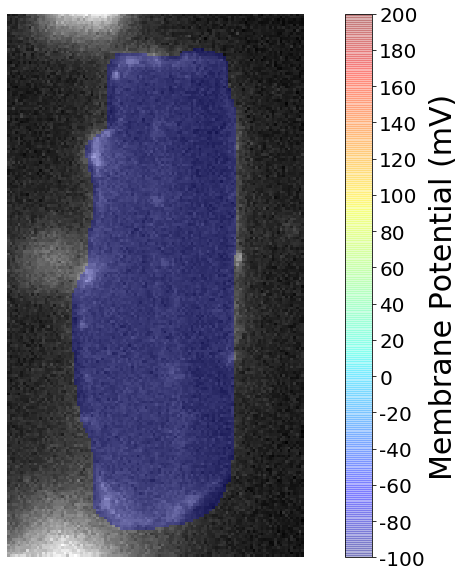

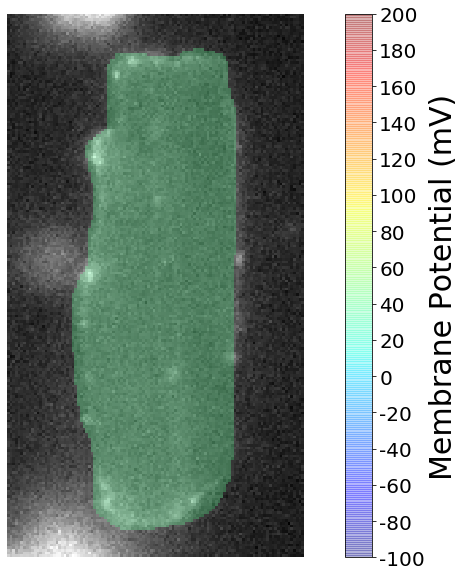

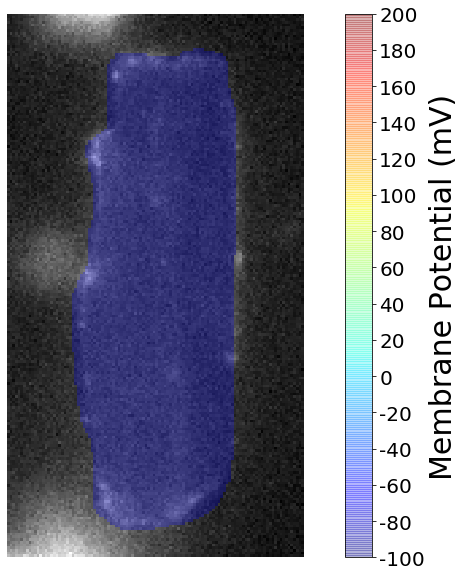

In [37]:
video_list = metroid.get_img_stacks(vmidpath)

from numpy.ma import masked_array
imname3 = 'AP_color_regions_'
lower_bound = -100
upper_bound=200

cmap = plt.cm.jet
norm = plt.Normalize(vmin=lower_bound, vmax=upper_bound)
i1 = np.argmin(abs(time_AP-t_sig_prop_AP[0]+0.1))#0.4sec
i2 = np.argmin(abs(time_AP-t_sig_prop_AP[0]))+1#0.5sec
i3 = np.argmin(abs(time_AP-t_sig_prop_AP[0]-0.1))#0.6sec

np.set_printoptions(precision=2,suppress=True)


i_vector = [i1, i2, i3]
print('Time instants = ',time_AP[i_vector],'s\n')
mask = np.zeros_like(label_ROIs_AP,bool)
mask[label_ROIs_AP>0] = True
for i in i_vector:
    segment_gray = np.zeros_like(label_ROIs_AP,int)
    for j in range(nregions):
        segment_gray[label_ROIs_AP==j+1] = segment_gray[label_ROIs_AP==j+1] + (AP_filt[i,j])
        
    v1a = masked_array(video_list[-1][i+1,:,:])
    v1b = masked_array(segment_gray,mask<=0)
    fig,ax = plt.subplots(figsize=[15,10])
    cax = ax.imshow(v1a,cmap='gray')

    cax1 = ax.imshow(v1b,cmap='jet',alpha=0.3,vmin=lower_bound,vmax=upper_bound)
    ax.axis('off')
    yticklabels=[-100,-80, -60, -40, -20, 0, 20, 40, 60, 80, 100, 120,140,160,180, 200]
    cbar = plt.colorbar(cax1,ticks=yticklabels)
    cbar.ax.set_ylabel('Membrane Potential (mV)',fontsize=30)
    cbar.ax.set_yticklabels(yticklabels,fontsize=20)
     # # Regions with striking different results
    print('AP18= %.2f' % AP_filt[i,17],' at %.2f' % time_AP[i],'s')
    print('AP25= %.2f' % AP_filt[i,24],' at %.2f' % time_AP[i],'s')
    print('AP26= %.2f' % AP_filt[i,25],' at %.2f' % time_AP[i],'s')
    imname = output_path + 'AP_MembranePotential_at_' + str(np.floor(time_AP[i]).astype(int)) + '_' + str(np.around(time_AP[i]*1000).astype(int))[-3:] + '_sec.tiff'
    plt.savefig(imname,bbox_inches='tight')

Time instants =  [0.   0.54 1.  ] s

EP18= -80.00  at 0.00 s
EP25= -80.00  at 0.00 s
EP26= -80.00  at 0.00 s
EP18= -62.42  at 0.54 s
EP25= 103.89  at 0.54 s
EP26= -38.00  at 0.54 s
EP18= -64.32  at 1.00 s
EP25= 84.00  at 1.00 s
EP26= -42.54  at 1.00 s


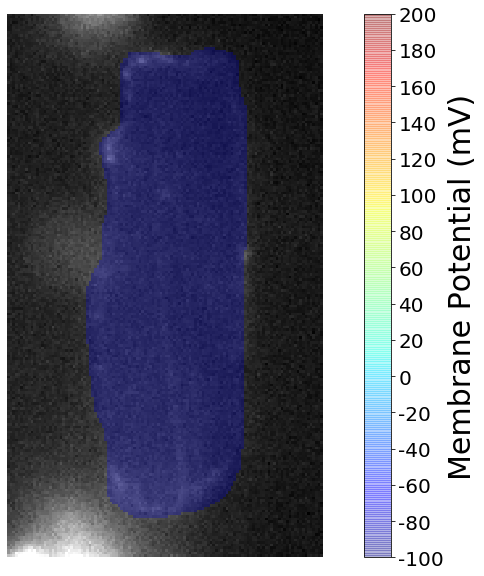

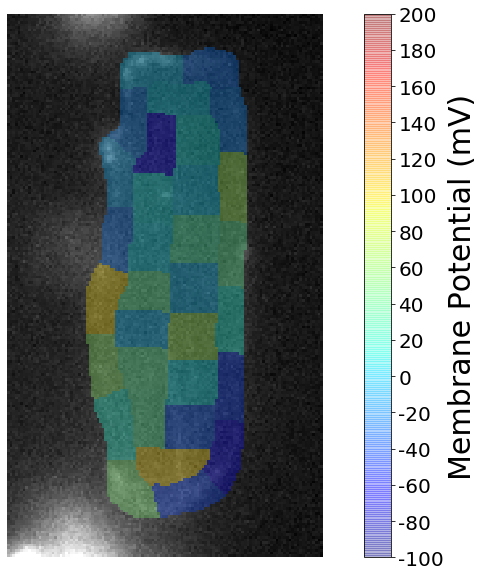

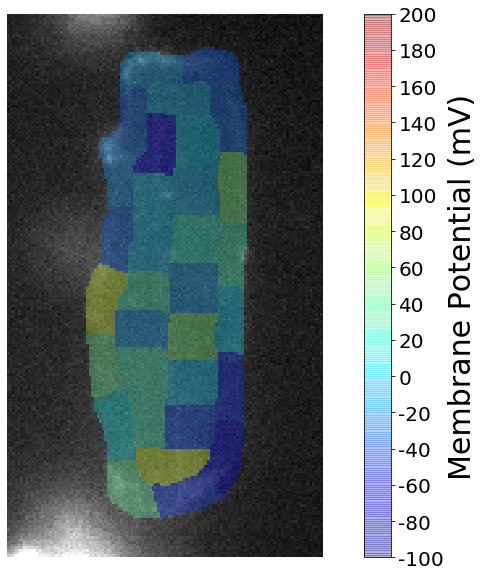

In [38]:
video_list = metroid.get_img_stacks(vlastpath)

from numpy.ma import masked_array
imname3 = 'EP_color_regions_'
lower_bound = -100
upper_bound=200

cmap = plt.cm.jet
norm = plt.Normalize(vmin=lower_bound, vmax=upper_bound)
i1 = np.argmin(abs(time_EP-t_sig_prop_EP[0]+0.5))#0sec
i2 = np.argmin(abs(time_EP-t_sig_prop_EP[0]))+2#0.5sec
i3 = np.argmin(abs(time_EP-t_sig_prop_EP[0]-0.5))#1sec

np.set_printoptions(precision=2,suppress=True)

i_vector = [i1, i2, i3]
print('Time instants = ',time_EP[i_vector],'s\n')
mask = np.zeros_like(label_ROIs_EP,bool)
mask[label_ROIs_EP>0] = True
for i in i_vector:
    segment_gray = np.zeros_like(label_ROIs_EP,int)
    for j in range(nregions):
        segment_gray[label_ROIs_EP==j+1] = segment_gray[label_ROIs_EP==j+1] + (EP_filt[i,j])
        
    v1a = masked_array(video_list[-1][i+1,:,:])
    v1b = masked_array(segment_gray,mask<=0)
    fig,ax = plt.subplots(figsize=[15,10])
    cax = ax.imshow(v1a,cmap='gray')

    cax1 = ax.imshow(v1b,cmap='jet',alpha=0.3,vmin=lower_bound,vmax=upper_bound)
    ax.axis('off')
    yticklabels=[-100,-80, -60, -40, -20, 0, 20, 40, 60, 80, 100, 120,140,160,180, 200]
    cbar = plt.colorbar(cax1,ticks=yticklabels)
    cbar.ax.set_ylabel('Membrane Potential (mV)',fontsize=30)
    cbar.ax.set_yticklabels(yticklabels,fontsize=20)
    # # Regions with striking different results
    print('EP18= %.2f' % EP_filt[i,17],' at %.2f' % time_EP[i],'s')
    print('EP25= %.2f' % EP_filt[i,24],' at %.2f' % time_EP[i],'s')
    print('EP26= %.2f' % EP_filt[i,25],' at %.2f' % time_EP[i],'s')
    imname = output_path + 'EP_MembranePotential_at_' + str(np.floor(time_EP[i]).astype(int)) + '_' + str(np.around(time_EP[i]*1000).astype(int))[-3:] + '_sec.tiff'
    plt.savefig(imname,bbox_inches='tight')

__Warning: Our computer simulations have shown that ROIs with SNR < -10dB for AP videos and SNR < -12.5dB for electroporation videos can lead to amplitude errors higher than 10%, therefore, we do not recommend relying in ROI results when SNR < -10dB. (Always check the SNR vs ROI# figure a few cells above)__